In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('dataset.csv') 

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [5]:
features=['County', 'State', 'Vehicle Primary Use', 'Year', 'Month']
target='Electric Vehicle (EV) Total'

In [6]:
encoders = {}

le_county = LabelEncoder()
df['County'] = le_county.fit_transform(df['County'])
encoders['County'] = le_county

le_state = LabelEncoder()
df['State'] = le_state.fit_transform(df['State'])
encoders['State'] = le_state

le_vehicle_use = LabelEncoder()
df['Vehicle Primary Use'] = le_vehicle_use.fit_transform(df['Vehicle Primary Use'])
encoders['Vehicle Primary Use'] = le_vehicle_use

joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']

In [8]:
df[target] = df[target].str.replace(",", "").astype(int)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

joblib.dump(model,"ev_demand.pkl")

['ev_demand.pkl']

In [9]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 13.87222142170989
MSE: 96090.72119666182
R2: 0.9885500924650293


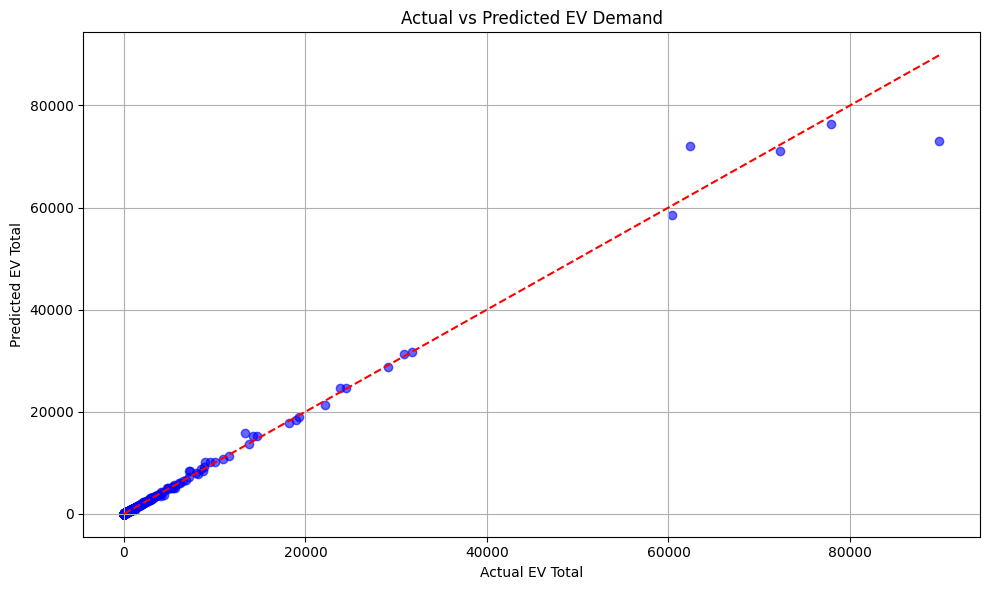

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual EV Total')
plt.ylabel('Predicted EV Total')
plt.title('Actual vs Predicted EV Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
def predict_ev_demand(date_str, county, state, vehicle_use):
    model = joblib.load("ev_demand.pkl")
    encoders = joblib.load("encoders.pkl")
    date = pd.to_datetime(date_str, format="%B %d %Y")
    year = date.year
    month = date.month
    county_enc = encoders['County'].transform([county])[0]
    state_enc = encoders['State'].transform([state])[0]
    vehicle_use_enc = encoders['Vehicle Primary Use'].transform([vehicle_use])[0]

    input_data = pd.DataFrame([[county_enc, state_enc, vehicle_use_enc, year, month]],
                              columns=['County', 'State', 'Vehicle Primary Use', 'Year', 'Month'])
    prediction = model.predict(input_data)[0]
    return prediction

print(predict_ev_demand("January 31 2020","Dakota","MN","Passenger"))

1.02
